# Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.losses import MeanSquaredError
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout


# Carregar o conjunto de dados

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
column_names = ['Sex', 'Length', 'Diameter', 'Height',
                'Whole weight', 'Shucked weight',
                'Viscera weight', 'Shell weight', 'Rings']
data = pd.read_csv(url, header=None, names=column_names)

#Formatando dados

In [ ]:
# Converter a variável categórica 'Sex' para variáveis dummy
data = pd.get_dummies(data, columns=['Sex'])

# Separar os recursos (features) e o alvo (target)
X = data.drop('Rings', axis=1)
y = data['Rings']

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em conjuntos de treino e teste

In [ ]:
#Dividindo em conjunto de treino e testes
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Definir o modelo

In [ ]:
model = Sequential()
model.add(Dense(160, kernel_initializer= 'normal',activation='relu',input_dim = 10))
model.add(Dropout(0.2))
model.add(Dense(480, kernel_initializer= 'normal',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, kernel_initializer='normal', activation='relu'))
model.add(Dense(1,kernel_initializer= 'normal', activation = 'linear'))

# Compilar o modelo
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mean_squared_error', metrics = [MeanSquaredError()])

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Avaliar o modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Erro Quadrático Médio (MSE): {mse}')

Epoch 1/100
84/84 [==============================] - 2s 13ms/step - loss: 25.2016 - mean_squared_error: 25.0924 - val_loss: 4.5238 - val_mean_squared_error: 4.5293
Epoch 2/100
84/84 [==============================] - 1s 7ms/step - loss: 7.5878 - mean_squared_error: 7.5792 - val_loss: 4.5917 - val_mean_squared_error: 4.5924
Epoch 3/100
84/84 [==============================] - 1s 7ms/step - loss: 6.1674 - mean_squared_error: 6.2143 - val_loss: 4.7484 - val_mean_squared_error: 4.7465
Epoch 4/100
84/84 [==============================] - 1s 7ms/step - loss: 5.9071 - mean_squared_error: 5.8936 - val_loss: 4.6138 - val_mean_squared_error: 4.6116
Epoch 5/100
84/84 [==============================] - 1s 7ms/step - loss: 5.5784 - mean_squared_error: 5.6012 - val_loss: 4.1392 - val_mean_squared_error: 4.1415
Epoch 6/100
84/84 [==============================] - 1s 7ms/step - loss: 5.4485 - mean_squared_error: 5.4433 - val_loss: 4.3184 - val_mean_squared_error: 4.3197
Epoch 7/100
84/84 [============

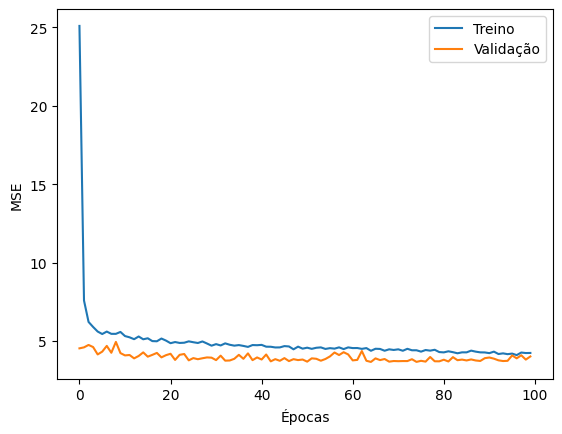

In [ ]:
# Plotar a perda de treino e validação ao longo das épocas
plt.plot(history.history['mean_squared_error'], label='Treino')
plt.plot(history.history['val_mean_squared_error'], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.show()


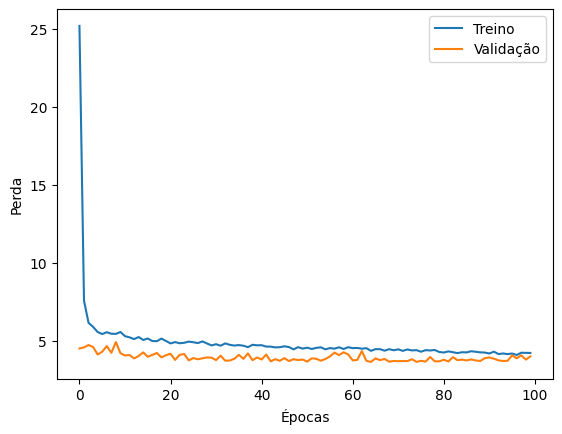

In [ ]:
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()